## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

## Read the sampled dataset
The dataset is publicly available at: https://www.unb.ca/cic/datasets/ids-2017.html  
Due to the large size of this dataset, the sampled subsets of the dataset is used.

In [3]:
#Read dataset
df = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
# The results in this code is based on the original dataset.

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [22]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.356503,-0.653857,-0.011451,-0.009362,-0.089086,-0.007581,-0.376966,-0.176667,-0.346068,-0.366591,...,-1.069400,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,BENIGN
1,-0.336856,-0.654742,0.001932,-0.005298,-0.062153,-0.007438,-0.256055,-0.294156,-0.284940,-0.227513,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,BENIGN
2,-0.355994,-0.654727,0.000594,-0.004282,0.421001,-0.006178,2.221784,-0.294156,1.614047,2.430793,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,BENIGN
3,-0.336856,-0.654397,0.009962,0.001815,0.469998,-0.004612,1.787831,-0.294156,0.903958,1.516334,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,BENIGN
4,-0.355994,-0.654727,-0.000744,-0.004282,0.421001,-0.006177,2.221784,-0.294156,1.836067,2.704747,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,BENIGN


In [6]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
df[' Label'].value_counts()

 Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

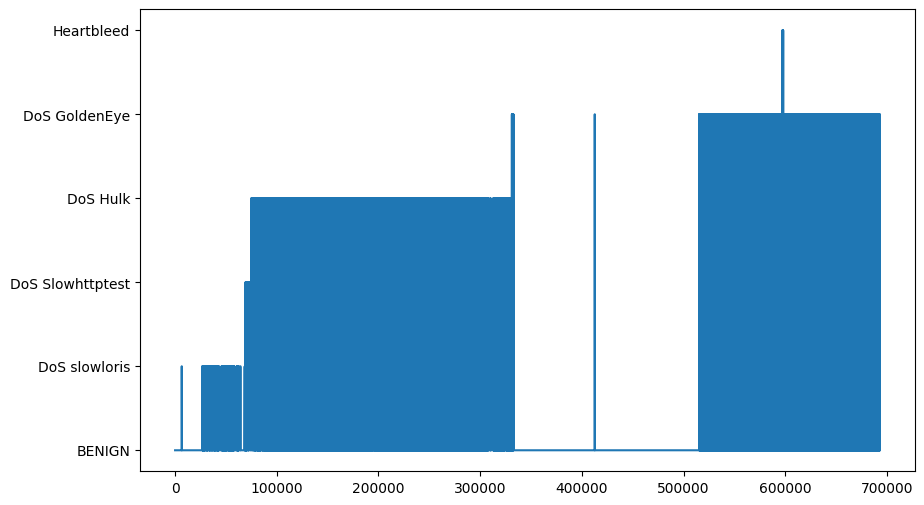

In [6]:
#bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x = df[' Label']
plt.plot(x)
plt.show()

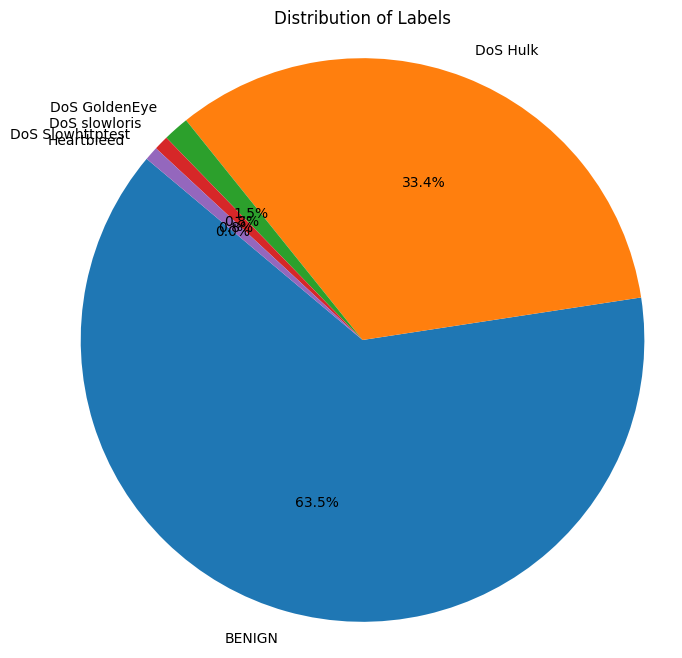

In [12]:
#pie chart

import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Label' column
label_counts = df[' Label'].value_counts()

# Get labels and sizes for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Labels')
plt.show()

### Preprocessing (normalization and padding values)

In [7]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [20]:
#features list
features
# df.describe

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
#checking for the top 10 best features of the avaialble 79 features.

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df is your DataFrame containing all the columns
X = df.drop(' Label', axis=1)  # Features
y = df[' Label']  # Target variable

# Train Random Forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Display top N important features
top_n = 10  # Adjust this number as needed
print(feature_importances_sorted.head(top_n))


 Max Packet Length         0.064173
 Avg Bwd Segment Size      0.061846
 Bwd Packet Length Std     0.053105
 Destination Port          0.051475
 Packet Length Variance    0.049508
 Packet Length Mean        0.048837
 Bwd Packet Length Mean    0.043760
 Average Packet Size       0.038812
Bwd Packet Length Max      0.037247
 Subflow Bwd Bytes         0.029714
dtype: float64


In [9]:
feature_importances_sorted[:10]

 Max Packet Length         0.064173
 Avg Bwd Segment Size      0.061846
 Bwd Packet Length Std     0.053105
 Destination Port          0.051475
 Packet Length Variance    0.049508
 Packet Length Mean        0.048837
 Bwd Packet Length Mean    0.043760
 Average Packet Size       0.038812
Bwd Packet Length Max      0.037247
 Subflow Bwd Bytes         0.029714
dtype: float64

In [28]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [31]:
df[' Bwd Packet Length Std'].head()

0   -0.599827
1   -0.518520
2    0.140878
3    0.290375
4    0.141348
Name:  Bwd Packet Length Std, dtype: float64

In [10]:
from sklearn.tree import DecisionTreeClassifier
col_names = [' Bwd Packet Length Std',' Avg Bwd Segment Size', ' Bwd Packet Length Mean',
    ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
    ' Max Packet Length', ' Destination Port', ' Average Packet Size', 'Init_Win_bytes_forward']
X = df[col_names]
y = df[' Label']
model = DecisionTreeClassifier()
model.fit(X, y)
pred = model.predict(X)
pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [11]:
#checking the difference between predicted values from  model and actual values
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y, pred)
print("Accuracy:", accuracy)

# Create a DataFrame to display actual and predicted values
result_df = pd.DataFrame({'Actual': y, 'Predicted': pred})
print(result_df)

Accuracy: 0.9922030076381941
        Actual Predicted
0       BENIGN    BENIGN
1       BENIGN    BENIGN
2       BENIGN    BENIGN
3       BENIGN    BENIGN
4       BENIGN    BENIGN
...        ...       ...
692698  BENIGN    BENIGN
692699  BENIGN    BENIGN
692700  BENIGN    BENIGN
692701  BENIGN    BENIGN
692702  BENIGN    BENIGN

[692703 rows x 2 columns]


### Data sampling
Due to the space limit of GitHub files and the large size of network traffic data, we sample a small-sized subset for model learning using **k-means cluster sampling**

In [12]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [13]:
df[' Label'].value_counts()

 Label
0    440031
2    231073
1     10293
4      5796
3      5499
5        11
Name: count, dtype: int64

In [14]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [44]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.356503,-0.653857,-0.011451,-0.009362,-0.089086,-0.007581,-0.376966,-0.176667,-0.346068,-0.366591,...,-1.069400,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
1,-0.336856,-0.654742,0.001932,-0.005298,-0.062153,-0.007438,-0.256055,-0.294156,-0.284940,-0.227513,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
2,-0.355994,-0.654727,0.000594,-0.004282,0.421001,-0.006178,2.221784,-0.294156,1.614047,2.430793,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
3,-0.336856,-0.654397,0.009962,0.001815,0.469998,-0.004612,1.787831,-0.294156,0.903958,1.516334,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
4,-0.355994,-0.654727,-0.000744,-0.004282,0.421001,-0.006177,2.221784,-0.294156,1.836067,2.704747,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,-0.358219,-0.653999,-0.007436,-0.008346,-0.071888,-0.007516,-0.340527,0.254124,-0.206513,-0.366591,...,-1.069400,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
692699,-0.358219,-0.654745,-0.010113,-0.008346,-0.076431,-0.007422,-0.317339,0.528264,-0.117705,-0.366591,...,-1.069400,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
692700,3.328144,-0.654751,-0.010113,-0.009362,-0.085029,-0.007581,-0.335558,-0.294156,-0.285805,-0.269653,...,0.828623,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0
692701,-0.358219,-0.630233,-0.004759,-0.008346,-0.058909,-0.007469,-0.333902,0.332450,-0.181139,-0.366591,...,-1.069400,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0


In [15]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df[' Label']==6)|(df[' Label']==1)|(df[' Label']==4)|(df[' Label']==3)|(df[' Label']==5)]
df_major = df.drop(df_minor.index)

In [16]:
X = df_major.drop([' Label'],axis=1)
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [17]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [18]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [19]:
df_major['klabel'].value_counts()

klabel
860    9330
721    6814
155    6613
567    5848
707    4675
       ... 
154       9
451       8
25        8
177       7
27        2
Name: count, Length: 985, dtype: int64

In [20]:
cols = list(df_major)
cols.insert(78, cols.pop(cols.index(' Label')))
df_major = df_major.loc[:, cols]

In [44]:
df_major

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,klabel
0,-0.331204,-0.709187,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,167
1,-0.310375,-0.710042,0.000688,-0.005948,-0.066428,-0.007842,-0.278524,-0.262472,-0.292761,-0.254258,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,924
2,-0.330665,-0.710029,-0.000571,-0.004993,0.392491,-0.006658,2.085994,-0.262472,1.523994,2.278957,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,86
3,-0.310375,-0.709709,0.008237,0.000739,0.439030,-0.005185,1.671888,-0.262472,0.844654,1.407529,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,981
4,-0.330665,-0.710029,-0.001829,-0.004993,0.392491,-0.006657,2.085994,-0.262472,1.736399,2.540019,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612055,0.639196,-0.710050,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,764
612056,-0.333024,-0.701827,-0.010637,-0.008814,-0.081530,-0.007785,-0.344908,0.456852,-0.163111,-0.386792,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,200
612057,-0.333024,0.695653,-0.008120,-0.006903,-0.071668,-0.007581,-0.341746,0.320764,-0.178283,-0.364894,...,-0.137381,-0.105308,-0.155457,-0.108472,0.940746,-0.111586,0.920831,0.951953,0,858
612059,1.901335,-0.710051,-0.011895,-0.009769,-0.092934,-0.007979,-0.403388,-0.262472,-0.387654,-0.386792,...,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0,257


In [21]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [52]:
result[' Label'].value_counts()

 Label
0    3504
2    1853
Name: count, dtype: int64

In [53]:
result

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.050770,-0.710051,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-1.067509,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0
1,3.058926,-0.710052,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-1.067509,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0
2,2.661963,-0.710052,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-1.067509,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0
3,3.082991,-0.710052,-0.011895,-0.009769,-0.092009,-0.007977,-0.393905,-0.145825,-0.351241,-0.386792,...,-1.067509,-0.137734,-0.105308,-0.155682,-0.108882,-0.626637,-0.111586,-0.632531,-0.616339,0
4,-0.331204,1.229663,-0.004346,-0.005948,-0.036070,-0.003115,0.179839,-0.262472,-0.067745,0.200960,...,0.838847,-0.136343,-0.105308,-0.154797,-0.107266,1.533878,-0.111586,1.508657,1.545428,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22200,-0.331204,-0.439302,-0.006862,-0.006903,-0.004016,-0.006500,0.508595,-0.262472,0.312677,0.700653,...,0.838847,-0.136647,-0.105308,-0.154990,-0.107618,-0.450916,-0.111586,-0.458382,-0.440516,1
22201,-0.331204,-0.439328,-0.006862,-0.006903,-0.032834,-0.006500,0.213030,-0.262472,0.085707,0.348223,...,0.838847,-0.135234,-0.105308,-0.154092,-0.105977,-0.450928,-0.111586,-0.458394,-0.440528,1
22202,-0.331204,-0.439326,-0.001829,-0.004993,-0.031293,-0.003099,0.228836,-0.262472,-0.117933,0.175103,...,0.838847,-0.136446,-0.105308,-0.154862,-0.107385,-0.450950,-0.111586,-0.458416,-0.440550,1
22203,-0.331204,-0.439353,-0.006862,-0.006903,-0.023896,-0.006500,0.304703,-0.262472,0.156104,0.457533,...,0.838847,-0.136500,-0.105308,-0.154897,-0.107448,-0.450964,-0.111586,-0.458429,-0.440564,1


In [22]:
result = result.drop(['klabel'],axis=1)

In [23]:
result = pd.concat([result, df_minor], ignore_index=True)

In [24]:
result.to_csv('extracted_sample.csv',index=0)

### split train set and test set

In [25]:
# Read the sampled dataset
df=pd.read_csv('extracted_sample.csv')

In [57]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.358219,-0.654748,-0.010113,-0.008346,-0.077080,-0.007503,-0.320651,0.489101,-0.130392,-0.366591,...,0.828623,-0.131646,-0.100396,-0.148670,-0.104366,-0.579979,-0.105686,-0.585240,-0.570780,0
1,-0.358219,-0.654747,-0.010113,-0.008346,-0.076431,-0.007498,-0.317339,0.528264,-0.117705,-0.366591,...,0.828623,-0.131646,-0.100396,-0.148670,-0.104366,-0.579979,-0.105686,-0.585240,-0.570780,0
2,-0.358219,-0.654748,-0.010113,-0.008346,-0.077080,-0.007497,-0.320651,0.489101,-0.130392,-0.366591,...,0.828623,-0.131646,-0.100396,-0.148670,-0.104366,-0.579979,-0.105686,-0.585240,-0.570780,0
3,-0.356503,1.640064,-0.002083,-0.004282,-0.028570,-0.002410,0.230900,-0.294156,-0.083609,0.215337,...,-1.069400,-0.128791,-0.100396,-0.146843,-0.101060,1.993193,-0.105686,1.963943,2.005562,2
4,-0.356503,1.661887,-0.000744,-0.004282,-0.026298,-0.002410,0.254088,-0.294156,-0.107132,0.202849,...,-1.069400,-0.128786,-0.100396,-0.146839,-0.101054,2.019423,-0.105686,1.989928,2.031824,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,-0.356503,-0.385567,-0.002083,-0.005298,-0.037168,-0.002394,0.153053,-0.294156,-0.125634,0.143117,...,0.828623,-0.130373,-0.100396,-0.147855,-0.102891,-0.409295,-0.105686,-0.416147,-0.399885,1
26952,-0.356503,-0.385541,-0.006098,-0.005298,-0.013643,-0.006011,0.393218,-0.294156,0.213421,0.564914,...,0.828623,-0.130336,-0.100396,-0.147831,-0.102848,-0.409259,-0.105686,-0.416111,-0.399849,1
26953,-0.356503,-0.385637,-0.003421,-0.004282,-0.039115,-0.002394,0.133177,-0.294156,-0.099581,0.158252,...,0.828623,-0.130363,-0.100396,-0.147848,-0.102880,-0.409398,-0.105686,-0.416249,-0.399989,1
26954,-0.356503,-0.385640,-0.002083,-0.005298,-0.030192,-0.002394,0.224274,-0.294156,-0.091538,0.210349,...,0.828623,-0.130341,-0.100396,-0.147835,-0.102855,-0.409354,-0.105686,-0.416205,-0.399944,1


In [26]:
X = df.drop([' Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

## Feature engineering

### Feature selection by information gain

In [28]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [29]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [30]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break

In [31]:
X_fs = df[fs].values

In [32]:
X_fs.shape

(26956, 46)

In [82]:
from google.colab import files
uploaded = files.upload()


Saving FCBF_module.py to FCBF_module.py


In [84]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
import FCBF_module

### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [35]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [36]:
X_fss = fcbf.fit_transform(X_fs,y)

In [37]:
X_fss.shape

(26956, 20)

### Re-split train & test sets after feature selection

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [39]:
X_train.shape

(21564, 20)

In [40]:
pd.Series(y_train).value_counts()

1    8214
4    4665
3    4365
0    2828
2    1482
5      10
Name: count, dtype: int64

In [42]:
%pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------------------- -------------------- 122.9/258.0 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

#### Apply XGBoost

Accuracy of XGBoost: 0.9949925816023739
Precision of XGBoost: 0.99499536270691
Recall of XGBoost: 0.9949925816023739
F1-score of XGBoost: 0.9949922870712924
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       1.00      0.99      0.99      1134
           4       1.00      0.99      1.00      1131
           5       1.00      1.00      1.00         1

    accuracy                           0.99      5392
   macro avg       0.99      0.99      0.99      5392
weighted avg       0.99      0.99      0.99      5392



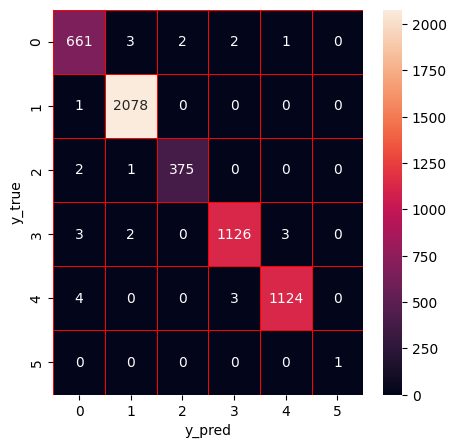

In [48]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [49]:
%pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.6 MB 3.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 7.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.6 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   --------------------------------------- 491.3/491.3 kB 32.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
   --------------------------------------- 200.5/200.5 kB 11.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:11<00:00,  1.70trial/s, best loss: -0.9964762611275965]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.5150225916335468, 'max_depth': 83.0, 'n_estimators': 25.0}


Accuracy of XGBoost: 0.9955489614243324
Precision of XGBoost: 0.9955493764732677
Recall of XGBoost: 0.9955489614243324
F1-score of XGBoost: 0.9955469080950465
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      0.99      0.99      1134
           4       1.00      0.99      0.99      1131
           5       1.00      1.00      1.00         1

    accuracy                           1.00      5392
   macro avg       1.00      1.00      1.00      5392
weighted avg       1.00      1.00      1.00      5392



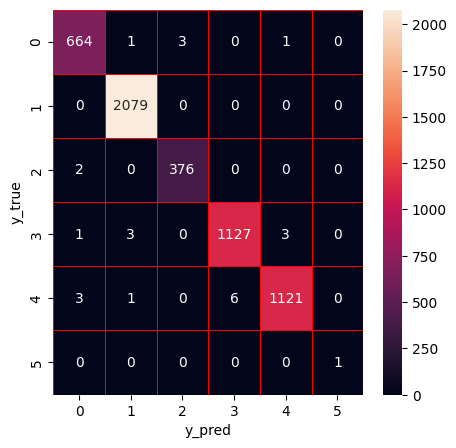

In [51]:
xg = xgb.XGBClassifier(learning_rate= 0.7340229699980686, n_estimators = 70, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [52]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [71]:
import xgboost as xgb
import joblib
from hyperopt import hp, fmin, tpe, STATUS_OK
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Train XGBoost classifier with the best hyperparameters
xg = xgb.XGBClassifier(learning_rate=0.7340229699980686, n_estimators=70, max_depth=14)
xg.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(xg, 'xgboost_model.pkl')

['xgboost_model.pkl']

#### Apply RF

Accuracy of RF: 0.995919881305638
Precision of RF: 0.9959290003085397
Recall of RF: 0.995919881305638
F1-score of RF: 0.9959197042477577
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      1.00      1134
           4       1.00      0.99      0.99      1131
           5       1.00      1.00      1.00         1

    accuracy                           1.00      5392
   macro avg       1.00      1.00      1.00      5392
weighted avg       1.00      1.00      1.00      5392



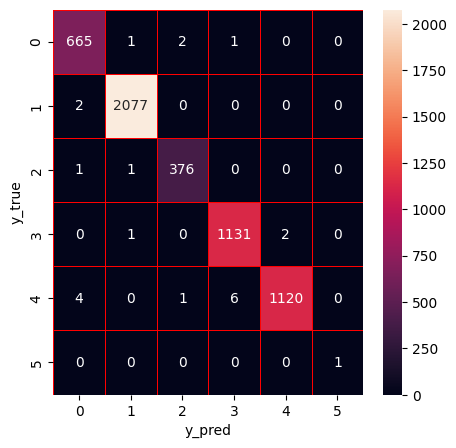

In [53]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [54]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [02:26<00:00,  7.30s/trial, best loss: -0.9951780415430267]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 32.0, 'max_features': 8.0, 'min_samples_leaf': 3.0, 'min_samples_split': 8.0, 'n_estimators': 187.0}


Accuracy of RF: 0.9946216617210683
Precision of RF: 0.9944451343470269
Recall of RF: 0.9946216617210683
F1-score of RF: 0.994529200767574
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      0.99      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           0.99      5392
   macro avg       0.83      0.83      0.83      5392
weighted avg       0.99      0.99      0.99      5392



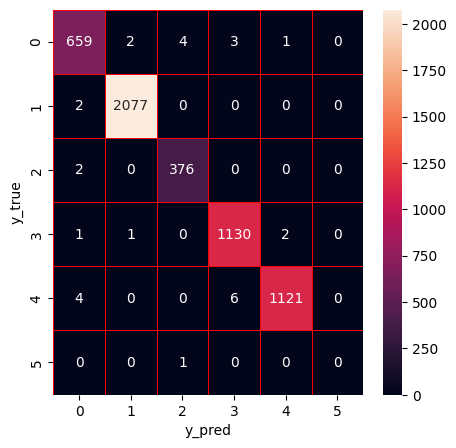

In [55]:
rf_hpo = RandomForestClassifier(n_estimators = 71, min_samples_leaf = 1, max_depth = 46, min_samples_split = 9, max_features = 20, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of RF: 0.995919881305638
Precision of RF: 0.9959290003085397
Recall of RF: 0.995919881305638
F1-score of RF: 0.9959197042477577
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      1.00      1134
           4       1.00      0.99      0.99      1131
           5       1.00      1.00      1.00         1

    accuracy                           1.00      5392
   macro avg       1.00      1.00      1.00      5392
weighted avg       1.00      1.00      1.00      5392



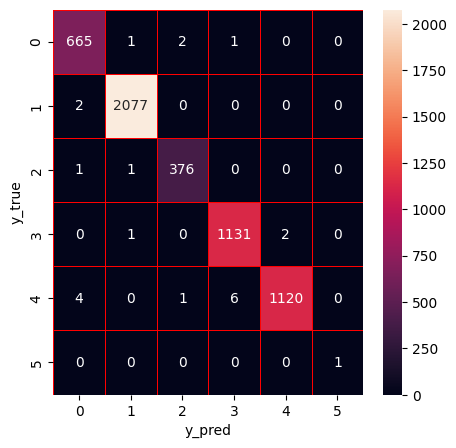

In [70]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Use the loaded model for predictions
y_predict = loaded_model.predict(X_test)

# Evaluate the loaded model
rf_score = loaded_model.score(X_test, y_test)
y_true = y_test
print('Accuracy of RF: ' + str(rf_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
# Visualize confusion matrix using seaborn heatmap
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Apply DT

Accuracy of DT: 0.9920252225519288
Precision of DT: 0.9918793835038067
Recall of DT: 0.9920252225519288
F1-score of DT: 0.991933005096721
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       669
           1       1.00      1.00      1.00      2079
           2       0.97      0.99      0.98       378
           3       0.99      0.99      0.99      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           0.99      5392
   macro avg       0.82      0.82      0.82      5392
weighted avg       0.99      0.99      0.99      5392



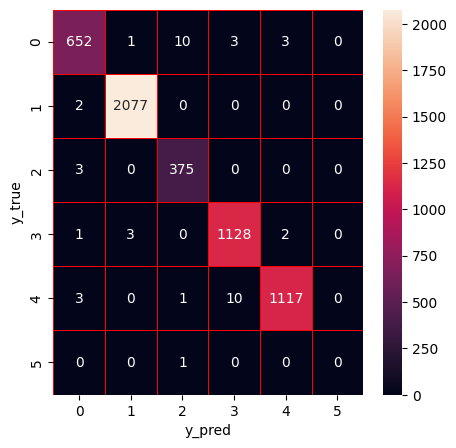

In [57]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [58]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:06<00:00,  8.11trial/s, best loss: -0.9949925816023739]
Decision tree: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 49.0, 'max_features': 16.0, 'min_samples_leaf': 1.0, 'min_samples_split': 10.0}


Accuracy of DT: 0.9918397626112759
Precision of DT: 0.9916620357783845
Recall of DT: 0.9918397626112759
F1-score of DT: 0.9917480972127082
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       669
           1       1.00      1.00      1.00      2079
           2       0.98      0.99      0.99       378
           3       0.99      0.99      0.99      1134
           4       0.99      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           0.99      5392
   macro avg       0.82      0.83      0.82      5392
weighted avg       0.99      0.99      0.99      5392



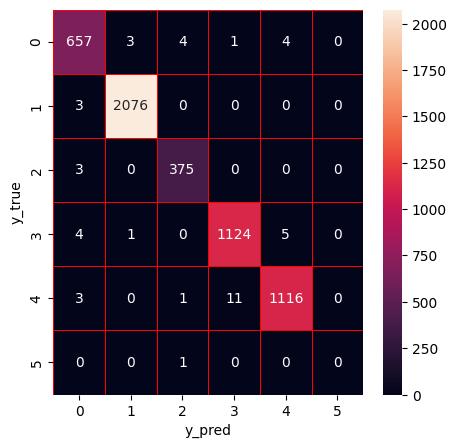

In [61]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9920252225519288
Precision of DT: 0.9918793835038067
Recall of DT: 0.9920252225519288
F1-score of DT: 0.991933005096721
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       669
           1       1.00      1.00      1.00      2079
           2       0.97      0.99      0.98       378
           3       0.99      0.99      0.99      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           0.99      5392
   macro avg       0.82      0.82      0.82      5392
weighted avg       0.99      0.99      0.99      5392



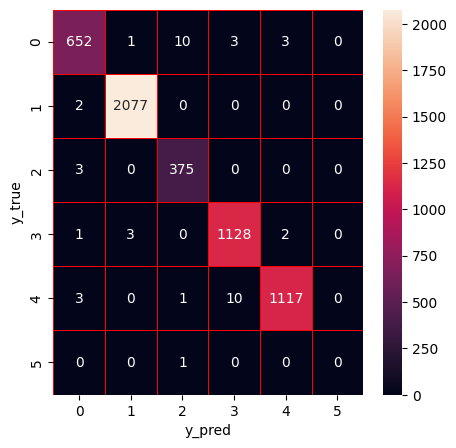

In [62]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Train the decision tree classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(dt, 'decision_tree_model.pkl')

# Load the saved model
loaded_model = joblib.load('decision_tree_model.pkl')

# Use the loaded model for predictions
y_predict = loaded_model.predict(X_test)

# Evaluate the loaded model
dt_score = loaded_model.score(X_test, y_test)
y_true = y_test
print('Accuracy of DT: ' + str(dt_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
# Visualize confusion matrix using seaborn heatmap
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Apply ET

Accuracy of ET: 0.994807121661721
Precision of ET: 0.9948164249085266
Recall of ET: 0.994807121661721
F1-score of ET: 0.9948067609948615
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.98      0.99      0.99       378
           3       0.99      0.99      0.99      1134
           4       1.00      0.99      0.99      1131
           5       1.00      1.00      1.00         1

    accuracy                           0.99      5392
   macro avg       0.99      0.99      0.99      5392
weighted avg       0.99      0.99      0.99      5392



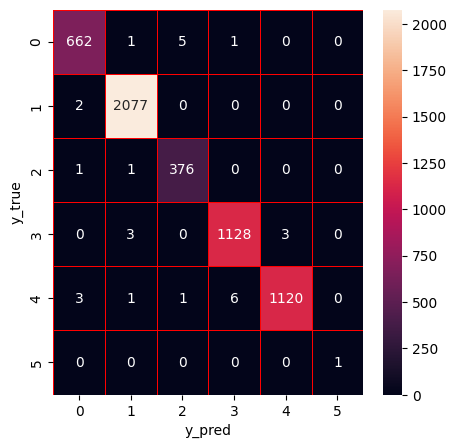

In [64]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [66]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [00:35<00:00,  1.76s/trial, best loss: -0.9938798219584569]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 28.0, 'max_features': 9.0, 'min_samples_leaf': 1.0, 'min_samples_split': 5.0, 'n_estimators': 46.0}


Accuracy of ET: 0.9953635014836796
Precision of ET: 0.9951860946326668
Recall of ET: 0.9953635014836796
F1-score of ET: 0.9952708313250245
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      1.00      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           1.00      5392
   macro avg       0.83      0.83      0.83      5392
weighted avg       1.00      1.00      1.00      5392



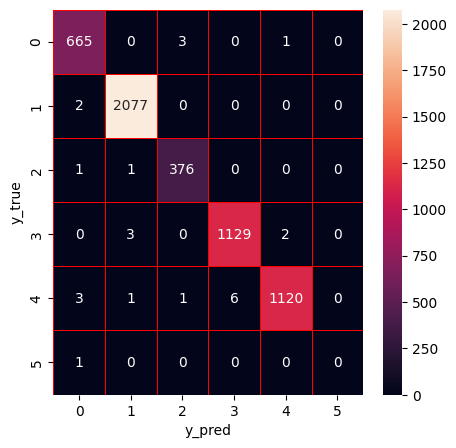

In [67]:
et_hpo = ExtraTreesClassifier(n_estimators = 53, min_samples_leaf = 1, max_depth = 31, min_samples_split = 5, max_features = 20, criterion = 'entropy')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.994807121661721
Precision of ET: 0.9948164249085266
Recall of ET: 0.994807121661721
F1-score of ET: 0.9948067609948615
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.98      0.99      0.99       378
           3       0.99      0.99      0.99      1134
           4       1.00      0.99      0.99      1131
           5       1.00      1.00      1.00         1

    accuracy                           0.99      5392
   macro avg       0.99      0.99      0.99      5392
weighted avg       0.99      0.99      0.99      5392



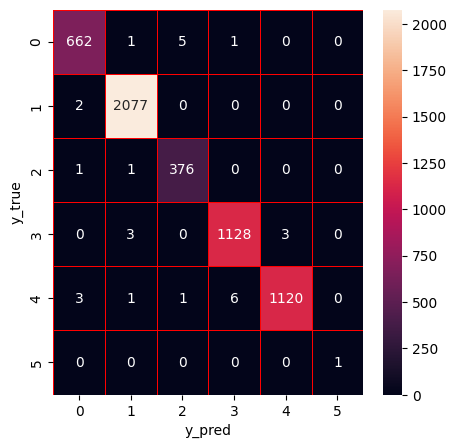

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import joblib

# Train the Extra Trees Classifier
et = ExtraTreesClassifier(random_state=0)
et.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(et, 'extra_trees_model.pkl')

# Load the saved model
loaded_model = joblib.load('extra_trees_model.pkl')

# Use the loaded model for predictions
y_predict = loaded_model.predict(X_test)

# Evaluate the loaded model
et_score = loaded_model.score(X_test, y_test)
y_true = y_test
print('Accuracy of ET: ' + str(et_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
# Visualize confusion matrix using seaborn heatmap
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [69]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

### Apply Stacking
The ensemble model that combines the four ML models (DT, RF, ET, XGBoost)

In [72]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,3,3,3,3
4,1,1,1,1


In [73]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [74]:
dt_train.shape

(21564, 1)

In [75]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9955489614243324
Precision of Stacking: 0.9953665374801698
Recall of Stacking: 0.9955489614243324
F1-score of Stacking: 0.9954536833719883
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      0.99      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           1.00      5392
   macro avg       0.83      0.83      0.83      5392
weighted avg       1.00      1.00      1.00      5392



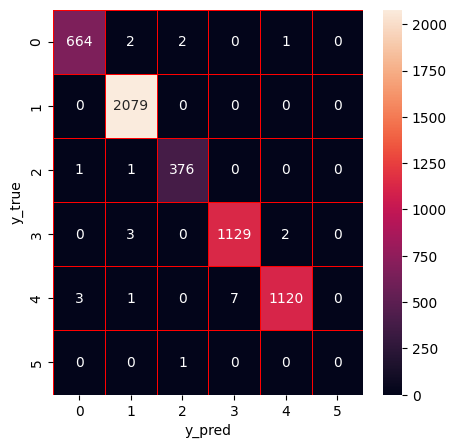

In [76]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [77]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [00:04<00:00,  4.41trial/s, best loss: -0.9955489614243324]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.12946520948819776, 'max_depth': 55.0, 'n_estimators': 30.0}


Accuracy of XGBoost: 0.9953635014836796
Precision of XGBoost: 0.9951841136473366
Recall of XGBoost: 0.9953635014836796
F1-score of XGBoost: 0.9952702207777457
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       669
           1       1.00      1.00      1.00      2079
           2       0.99      0.99      0.99       378
           3       0.99      1.00      0.99      1134
           4       1.00      0.99      0.99      1131
           5       0.00      0.00      0.00         1

    accuracy                           1.00      5392
   macro avg       0.83      0.83      0.83      5392
weighted avg       1.00      1.00      1.00      5392



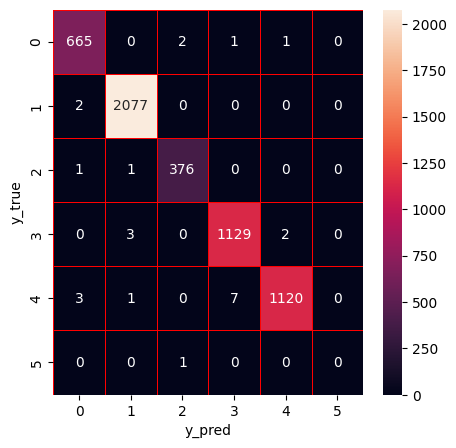

In [78]:
xg = xgb.XGBClassifier(learning_rate= 0.19229249758051492, n_estimators = 30, max_depth = 36)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Anomaly-based IDS

### Generate the port-scan datasets for unknown attack detection

In [80]:
df=pd.read_csv('extracted_sample.csv')

In [81]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [82]:
df[' Label'].value_counts()

 Label
1    10293
4     5796
3     5499
0     3497
2     1860
5       11
Name: count, dtype: int64

In [84]:
df1 = df[df[' Label'] != 5]
df1[' Label'][df1[' Label'] > 0] = 1
df1.to_csv('sample_without_portscan.csv',index=0)

In [85]:
df2 = df[df[' Label'] == 5]
df2[' Label'][df2[' Label'] == 5] = 1
df2.to_csv('sample_portscan.csv',index=0)

### Read the generated datasets for unknown attack detection

In [86]:
df1 = pd.read_csv('sample_without_portscan.csv')
df2 = pd.read_csv('sample_portscan.csv')

In [87]:
features = df1.drop([' Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [88]:
df1[' Label'].value_counts()

 Label
1    23448
0     3497
Name: count, dtype: int64

In [89]:
df2[' Label'].value_counts()

 Label
1    11
Name: count, dtype: int64

In [90]:
df2p=df1[df1[' Label']==0]
df2pp=df2p.sample(n=None, frac=1255/18225, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [91]:
df2[' Label'].value_counts()

 Label
0    241
1     11
Name: count, dtype: int64

In [92]:
# df = df1.append(df2)
df = pd.concat([df1, df2], ignore_index=True)

In [93]:
X = df.drop([' Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
pd.Series(y).value_counts()

1    23459
0     3738
Name: count, dtype: int64

### Feature engineering (IG, FCBF, and KPCA)

#### Feature selection by information gain (IG)

In [94]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [95]:
importances

array([3.25821976e-01, 2.48972846e-01, 7.58262047e-02, 1.16255572e-01,
       2.51644788e-01, 2.52350377e-01, 2.73351324e-01, 1.98539226e-01,
       1.94918732e-01, 9.79521204e-02, 2.40462230e-01, 1.60363164e-01,
       2.61361898e-01, 1.26599719e-01, 0.00000000e+00, 9.93898358e-04,
       2.28361936e-01, 1.81165774e-01, 2.54532553e-01, 1.25537804e-01,
       2.18078246e-01, 2.13505734e-01, 1.22305251e-01, 2.33920113e-01,
       1.23020856e-01, 1.51803508e-01, 1.47370093e-01, 8.38223169e-02,
       1.69230201e-01, 1.26550931e-01, 3.42131928e-03, 0.00000000e+00,
       1.93448302e-03, 0.00000000e+00, 2.09477536e-01, 1.68650091e-01,
       2.21564682e-01, 2.07309284e-01, 1.93947349e-01, 3.05290440e-01,
       2.49081447e-01, 2.46813847e-01, 2.49092791e-01, 1.67305905e-03,
       2.37261728e-03, 2.31102579e-03, 4.52080217e-02, 3.48983973e-03,
       8.32283667e-03, 0.00000000e+00, 0.00000000e+00, 7.44891889e-02,
       2.49920016e-01, 1.97362482e-01, 2.59457422e-01, 2.11613920e-01,
      

In [96]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [97]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break

In [98]:
X_fs = df[fs].values

In [99]:
X_fs.shape

(27197, 47)

In [100]:
X_fs

array([[-0.1580426 , -1.24396003, -0.64517169, ..., -0.38163586,
        -0.50306827, -0.52963211],
       [-0.1580426 , -1.24396003, -0.64517169, ..., -0.38163576,
        -0.50306827, -0.52963211],
       [-0.1580426 , -1.24396003, -0.64484174, ..., -0.38163586,
        -0.50306827, -0.52963211],
       ...,
       [-0.10611741,  0.80037699,  0.26088896, ..., -0.38163583,
         0.69786079, -0.1728285 ],
       [-0.15444778,  0.80037699, -0.4287202 , ..., -0.38162983,
        -0.46994928, -0.20590875],
       [-0.1580426 , -1.24396003, -0.64880122, ..., -0.38163586,
        -0.50306827, -0.52963211]])

#### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [101]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [102]:
X_fss = fcbf.fit_transform(X_fs,y)

In [103]:
X_fss.shape

(27197, 20)

In [104]:
X_fss

array([[-0.1580426 ,  0.84621648,  2.38374701, ..., -0.21848414,
        -0.63120732, -0.60486524],
       [-0.1580426 ,  0.87249204,  2.38374701, ..., -0.21754747,
        -0.6295282 , -0.60299473],
       [-0.1580426 ,  0.8987676 ,  2.41249974, ..., -0.2166108 ,
        -0.62672967, -0.59987722],
       ...,
       [-0.10611741, -0.17853048, -0.20399873, ...,  0.17538543,
        -0.40411309, -0.43096872],
       [-0.15444778, -0.17853048, -0.20399873, ..., -0.05128861,
        -0.68347232, -0.68485177],
       [-0.1580426 ,  0.71483866,  2.06746698, ..., -0.22316749,
        -0.65191646, -0.62793485]])

####  kernel principal component analysis (KPCA)

In [107]:
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 10, kernel = 'rbf')
# kpca.fit(X_fss, y)
# X_kpca = kpca.transform(X_fss)

from sklearn.decomposition import PCA
kpca = PCA(n_components = 10)
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)

### Train-test split after feature selection

In [108]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

### Solve class-imbalance by SMOTE

In [109]:
pd.Series(y_train).value_counts()

1    23448
0     3497
Name: count, dtype: int64

In [111]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:23448})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [112]:
pd.Series(y_train).value_counts()

1    23448
0     3497
Name: count, dtype: int64

In [113]:
pd.Series(y_test).value_counts()

0    241
1     11
Name: count, dtype: int64

### Apply the cluster labeling (CL) k-means method

In [114]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [115]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [116]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       1.00      0.56      0.71       241
           1       0.09      1.00      0.17        11

    accuracy                           0.58       252
   macro avg       0.55      0.78      0.44       252
weighted avg       0.96      0.58      0.69       252

0.5753968253968254
[[134 107]
 [  0  11]]


In [119]:
%pip install scikit-optimize scipy

   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   -------------------------------------- - 102.4/107.7 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 107.7/107.7 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Hyperparameter optimization of CL-k-means
Tune "k"

In [120]:
#Hyperparameter optimization by BO-GP
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']

    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.6666666666666666
43 0.7341269841269841
43 0.7380952380952381
43 0.7896825396825397
32 0.7936507936507936
20 0.7023809523809523
16 0.6626984126984127
5 0.47619047619047616
15 0.6785714285714286
25 0.5436507936507936
33 0.7420634920634921
47 0.7857142857142857
50 0.7658730158730159
36 0.6666666666666666
4 0.04365079365079365
30 0.7579365079365079
18 0.626984126984127
40 0.7222222222222222
17 0.5079365079365079
11 0.42857142857142855
7.6499714851379395
Best score=0.7937
Best parameters: n_clusters=32


In [121]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']),
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']

    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

15 0.6031746031746031                                 
19 0.6666666666666666                                                            
19 0.5753968253968254                                                            
19 0.7380952380952381                                                            
12 0.6468253968253969                                                            
46 0.7420634920634921                                                            
8 0.4603174603174603                                                             
25 0.6587301587301587                                                           
32 0.746031746031746                                                            
42 0.7261904761904762                                                            
5 0.4246031746031746                                                              
47 0.7896825396825397                                                             
45 0.7936507936507936                      

In [122]:
CL_kmeans(X_train, X_test, y_train, y_test, 16)

              precision    recall  f1-score   support

           0       1.00      0.61      0.75       241
           1       0.10      1.00      0.19        11

    accuracy                           0.62       252
   macro avg       0.55      0.80      0.47       252
weighted avg       0.96      0.62      0.73       252

0.623015873015873
[[146  95]
 [  0  11]]


### Apply the CL-k-means model with biased classifiers

In [131]:
# Only a sample code to show the logic. It needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y2,result2)
    print(str(acc))
    print(cm)

    #Biased classifier construction
    count=0
    print(len(y))
    a=np.zeros(n)
    b=np.zeros(n)
    FNL=[]
    FPL=[]
    for v in range(0,n):
        al=[]
        bl=[]
        for i in range(0,len(y)):
            if result[i]==v:
                if y[i]==1:        #label 1
                    a[v]=a[v]+1
                    al.append(i)
                else:             #label 0
                    b[v]=b[v]+1
                    bl.append(i)
        if a[v]<=b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)
        #print(str(v)+"="+str(a[v]/(a[v]+b[v])))

    dffp=df.iloc[FPL, :]
    dffn=df.iloc[FNL, :]
    dfva0=df[df['Label']==0]
    dfva1=df[df['Label']==1]

    dffpp=dfva1.sample(n=None, frac=len(FPL)/dfva1.shape[0], replace=False, weights=None, random_state=None, axis=0)
    dffnp=dfva0.sample(n=None, frac=len(FNL)/dfva0.shape[0], replace=False, weights=None, random_state=None, axis=0)

    dffp_f=pd.concat([dffp, dffpp])
    dffn_f=pd.concat([dffn, dffnp])

    Xp = dffp_f.drop(['Label'],axis=1)
    yp = dffp_f.iloc[:, -1].values.reshape(-1,1)
    yp=np.ravel(yp)

    Xn = dffn_f.drop(['Label'],axis=1)
    yn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    yn=np.ravel(yn)

    rfp = RandomForestClassifier(random_state = 42)
    rfp.fit(Xp,yp)
    rfn = RandomForestClassifier(random_state = 42)
    rfn.fit(Xn,yn)

    dffnn_f=pd.concat([dffn, dffnp])

    Xnn = dffn_f.drop(['Label'],axis=1)
    ynn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    ynn=np.ravel(ynn)

    rfnn = RandomForestClassifier(random_state = 0)
    rfnn.fit(Xnn,ynn)

    X2p = df2.drop(['Label'],axis=1)
    y2p = df2.iloc[:, -1].values.reshape(-1,1)
    y2p=np.ravel(y2p)

    result2 = km_cluster.predict(X2p)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y)):
            if result[i]==v:
                if y[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    l1=[]
    l0=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0,len(y2p)):
        if result2[v] in list1:
            result2[v]=0
            l0.append(v)
        elif result2[v] in list2:
            result2[v]=1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm=confusion_matrix(y2p,result2)
    print(cm)

# res_final = Anomaly_IDS(X_train, X_test, y_train, y_test,n = 10, b=100)
# res_final


In [135]:
CL_kmeans(X_train, X_test, y_train, y_test, 256)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       241
           1       0.19      0.45      0.27        11

    accuracy                           0.89       252
   macro avg       0.58      0.68      0.61       252
weighted avg       0.94      0.89      0.91       252

0.8928571428571429
[[220  21]
 [  6   5]]
